In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

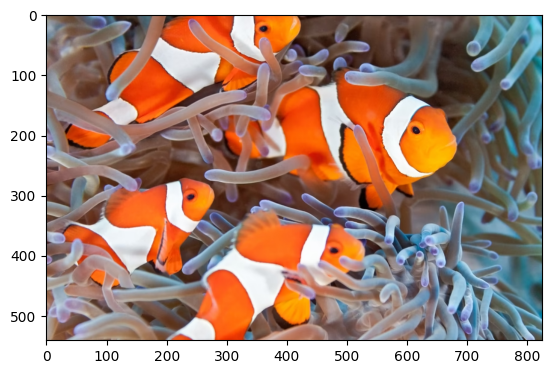

In [ ]:
fish = cv2.imread("/content/clown_fish.png")
fish_rgb = cv2.cvtColor(fish, cv2.COLOR_BGR2RGB)
fish_gray = cv2.cvtColor(fish_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(fish_rgb)

In [ ]:
fish_rgb.shape

(541, 825, 3)

In [ ]:
r, g, b = cv2.split(fish_rgb)

In [ ]:
data = fish_rgb.reshape(-1, 3)
data = np.float32(data)
data.shape

(446325, 3)

In [ ]:
K = 4

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [ ]:
compact, labels, centers = cv2.kmeans(data, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [ ]:
compact

955741257.6551776

In [ ]:
labels

array([[3],
       [3],
       [3],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
centers

array([[ 89.71429 ,  71.36744 ,  63.844395],
       [215.40718 , 219.80756 , 226.47029 ],
       [235.61003 ,  98.84932 ,  22.368048],
       [140.59871 , 137.22894 , 143.52179 ]], dtype=float32)

In [ ]:
segmented_labels = labels.reshape(fish.shape[0], fish.shape[1])

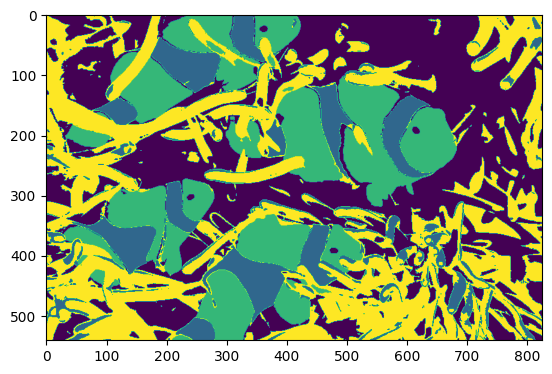

In [ ]:
plt.imshow(segmented_labels)

In [ ]:
cluster_masks = []
for i in range(K):
  mask = (segmented_labels == i)
  cluster_masks.append(mask)

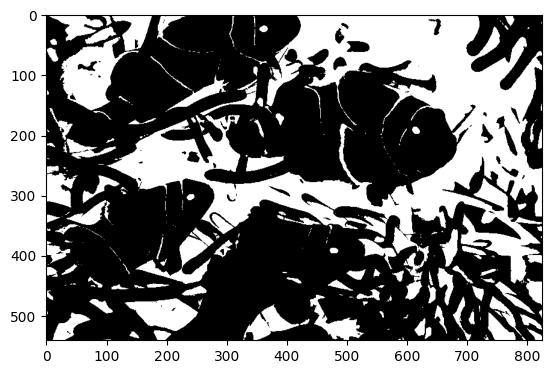

In [ ]:
plt.imshow(cluster_masks[0], cmap='gray')

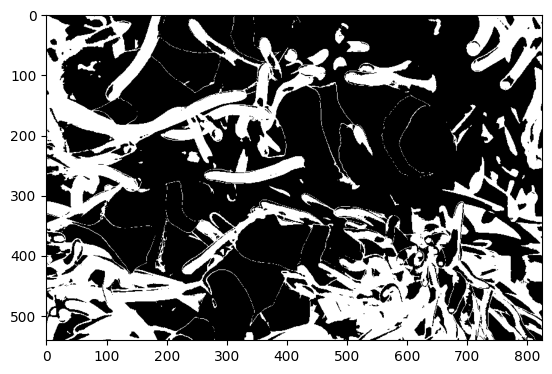

In [ ]:
plt.imshow(cluster_masks[3], cmap='gray')

In [ ]:
cluster_mask_images = []
for i, mask in enumerate(cluster_masks):
  cluster_color = centers[i]
  cluster_mask_rgb = np.zeros_like(fish_rgb)
  cluster_mask_rgb[mask] = cluster_color
  cluster_mask_images.append(cluster_mask_rgb)

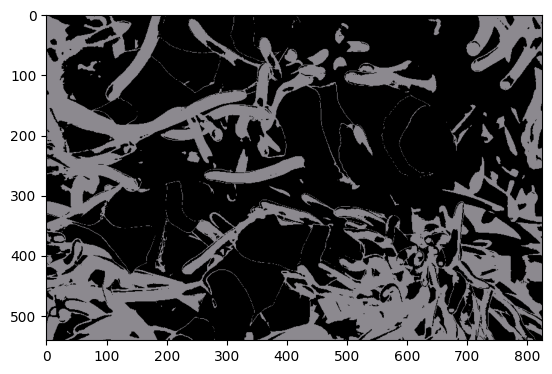

In [ ]:
plt.imshow(cluster_mask_images[3])

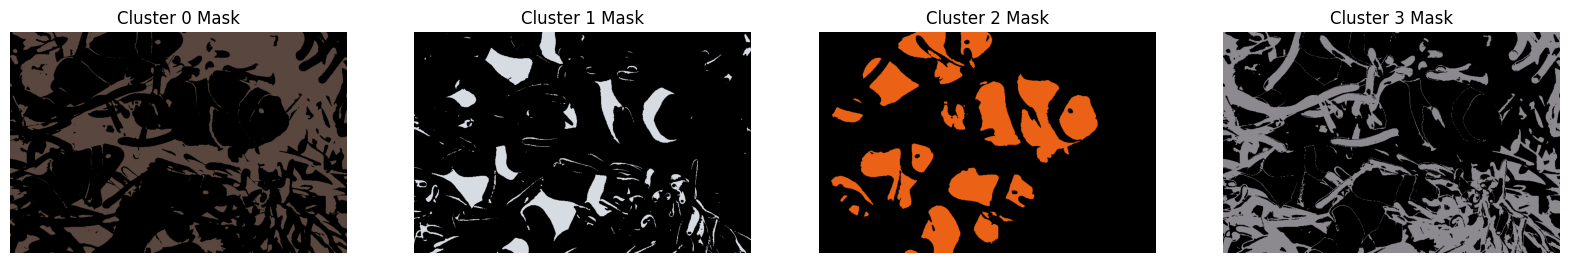

In [ ]:
plt.figure(figsize = (20, 20))
for i, mask_image in enumerate(cluster_mask_images):
  plt.subplot(1, K, i+1)
  plt.imshow(mask_image)
  plt.title(f'Cluster {i} Mask')
  plt.axis('off')

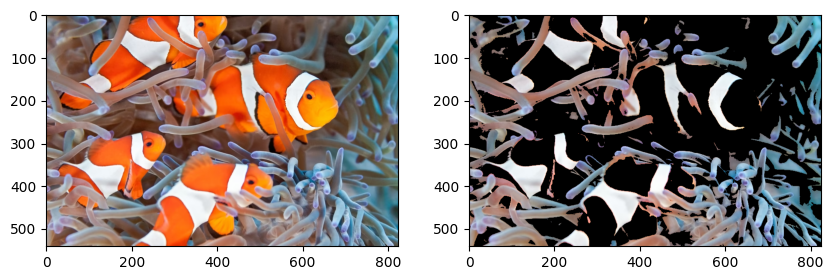

In [ ]:
merged_mask = cluster_masks[1] | cluster_masks[3]
merged_mask_rgb = np.zeros_like(fish_rgb)
merged_mask_rgb[merged_mask] = fish_rgb[merged_mask]

plt.figure(figsize = (10, 10), dpi = 100)
plt.subplot(1, 2, 1)
plt.imshow(fish_rgb)
plt.subplot(1, 2, 2)
plt.imshow(merged_mask_rgb)
plt.show()

Task- 3(b)


1. Import image "dog_segment.png" image using cv2
2. Convert image from BGR to RGB.
3. Separate the dog region from the image using clustering segmentation approach.
4. Perform appropriate morphological operations to refine the segmentation results.
5. Import image "fruits_segment.png" image using cv2
6. Convert imae from BGR to RGB.
7. Separate the different fruits region from the image using thresholding segmentation approach and Perform appropriate morphological operations to refine the segmentation results.
8. Separate the different fruits region from the image using clustering segmentation approach and perform appropriate morphological operations to refine the segmentation results

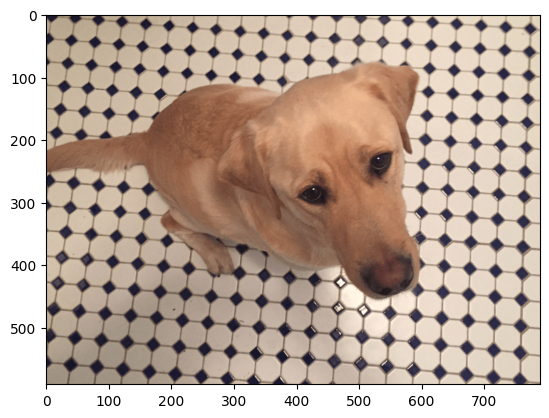

In [ ]:
#Import image "dog_segment.png" image using cv2
#Convert image from BGR to RGB.
dog = cv2.imread("/content/dog_segment.png")
dog_rgb = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)
dog_gray = cv2.cvtColor(dog_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(dog_rgb)

In [ ]:
dog_rgb.shape

(591, 789, 3)

In [ ]:
r, g, b = cv2.split(dog_rgb)

In [ ]:
data1 = dog_rgb.reshape(-1, 3)
data1 = np.float32(data1)
data1.shape

(466299, 3)

In [ ]:
K=8

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [ ]:
compact, labels, centers = cv2.kmeans(data1, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [ ]:
compact

129847779.15383339

In [ ]:
labels

array([[3],
       [2],
       [4],
       ...,
       [3],
       [3],
       [3]], dtype=int32)

In [ ]:
centers

array([[174.32732 , 157.0407  , 139.66238 ],
       [211.37366 , 158.87787 , 123.37169 ],
       [135.39534 ,  97.08295 ,  76.494545],
       [163.86752 , 124.545555,  99.82332 ],
       [ 92.03358 ,  69.47157 ,  66.623024],
       [203.73117 , 185.1107  , 165.30016 ],
       [ 41.251854,  36.802616,  55.987743],
       [232.48949 , 216.50642 , 199.12222 ]], dtype=float32)

In [ ]:
segmented_labels1 = labels.reshape(dog.shape[0], dog.shape[1])

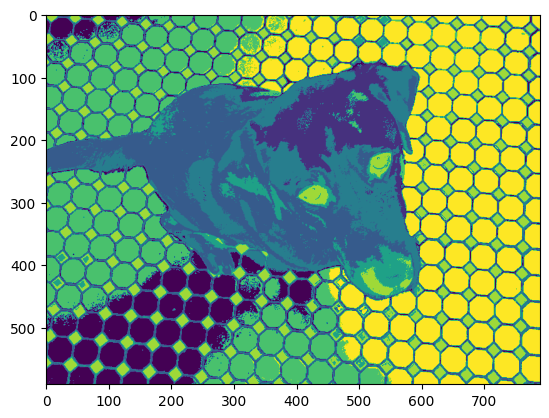

In [ ]:
plt.imshow(segmented_labels1)

In [ ]:
cluster_masks = []
for i in range(K):
  mask = (segmented_labels1 == i)
  cluster_masks.append(mask)

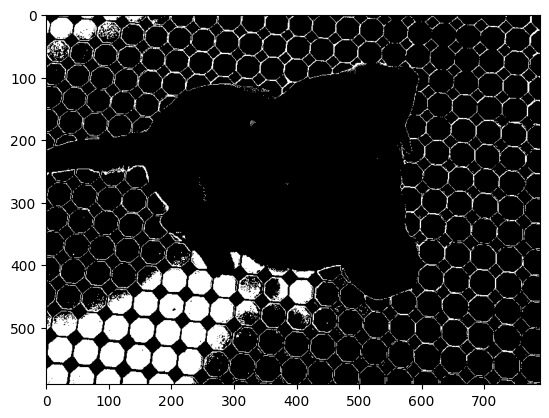

In [ ]:
plt.imshow(cluster_masks[0], cmap='gray')

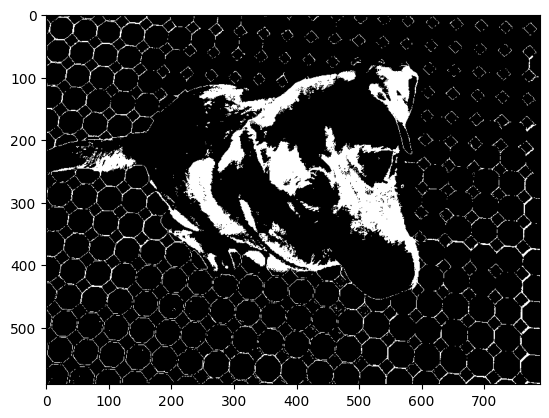

In [ ]:
plt.imshow(cluster_masks[3], cmap='gray')

In [ ]:
cluster_mask_images = []
for i, mask in enumerate(cluster_masks):
  cluster_color = centers[i]
  cluster_mask_rgb = np.zeros_like(dog_rgb)
  cluster_mask_rgb[mask] = cluster_color
  cluster_mask_images.append(cluster_mask_rgb)

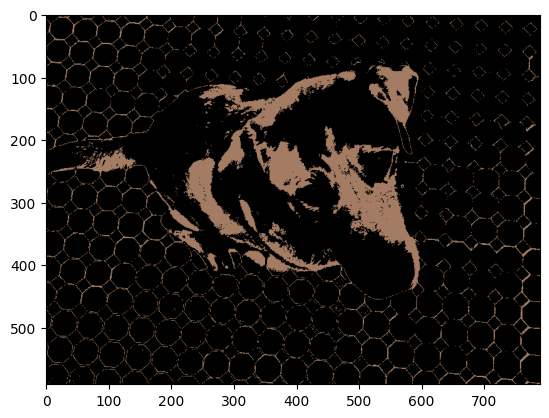

In [ ]:
plt.imshow(cluster_mask_images[3])

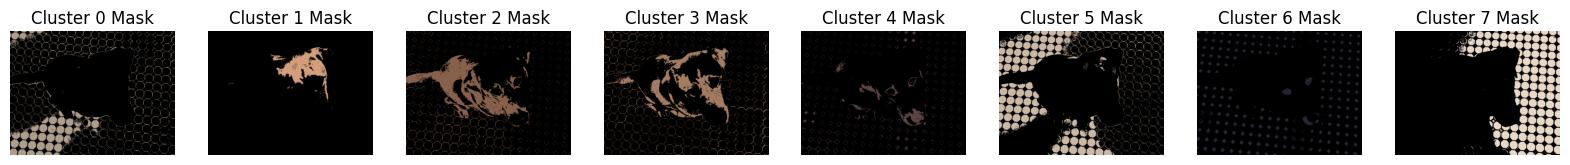

In [ ]:
plt.figure(figsize = (20, 20))
for i, mask_image in enumerate(cluster_mask_images):
  plt.subplot(1, K, i+1)
  plt.imshow(mask_image)
  plt.title(f'Cluster {i} Mask')
  plt.axis('off')

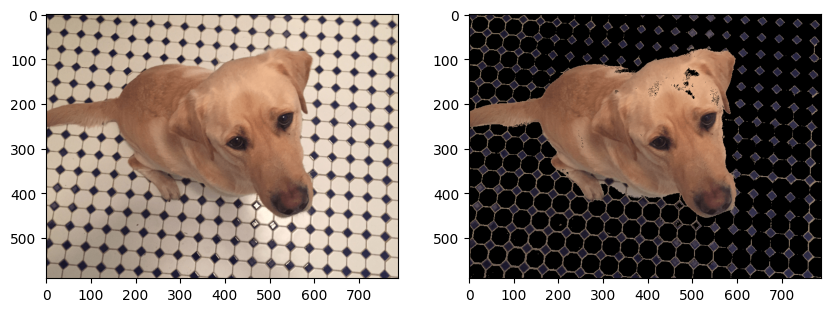

In [ ]:
merged_mask = cluster_masks[1] | cluster_masks[2] | cluster_masks[4] | cluster_masks[6] | cluster_masks[3]
merged_mask_rgb = np.zeros_like(dog_rgb)
merged_mask_rgb[merged_mask] = dog_rgb[merged_mask]

plt.figure(figsize = (10, 10), dpi = 100)
plt.subplot(1, 2, 1)
plt.imshow(dog_rgb)
plt.subplot(1, 2, 2)
plt.imshow(merged_mask_rgb)
plt.show()

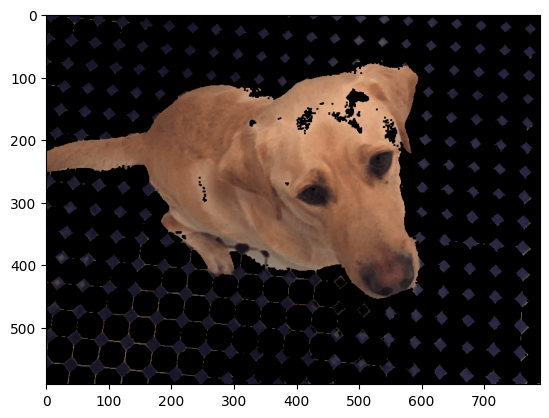

In [ ]:
kernel = np.ones((3,3))
erosion = cv2.erode(merged_mask_rgb, kernel, iterations=1)
plt.imshow(erosion, cmap='gray')

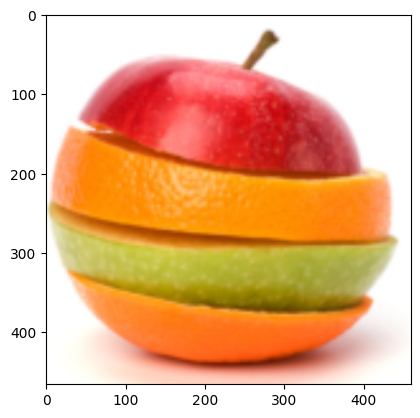

In [ ]:
fruit = cv2.imread("/content/fruits_segment.png")
fruit_rgb = cv2.cvtColor(fruit, cv2.COLOR_BGR2RGB)
plt.imshow(fruit_rgb)

In [ ]:
fruit_rgb.shape

(466, 460, 3)

In [ ]:
r, g, b = cv2.split(fruit_rgb)

In [ ]:
data2 = fruit_rgb.reshape(-1, 3)
data2 = np.float32(data2)
data2.shape

(214360, 3)

In [ ]:
K=4

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [ ]:
compact, labels, centers = cv2.kmeans(data2, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [ ]:
compact

355850142.47412014

In [ ]:
labels

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [ ]:
centers

array([[247.41125 , 136.95396 ,  23.624912],
       [253.72276 , 248.37224 , 245.84749 ],
       [191.20322 ,  62.725983,  33.031986],
       [218.77255 , 162.6453  ,  99.39457 ]], dtype=float32)

In [ ]:
segmented_labels2 = labels.reshape(fruit.shape[0], fruit.shape[1])

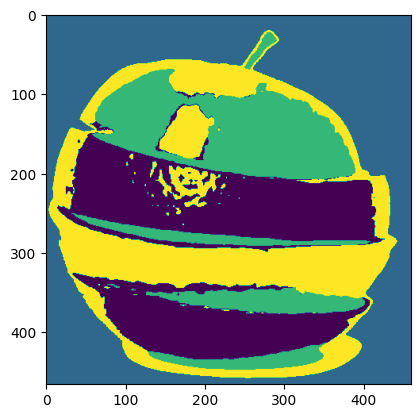

In [ ]:
plt.imshow(segmented_labels2)

In [ ]:
cluster_masks = []
for i in range(K):
  mask = (segmented_labels2 == i)
  cluster_masks.append(mask)

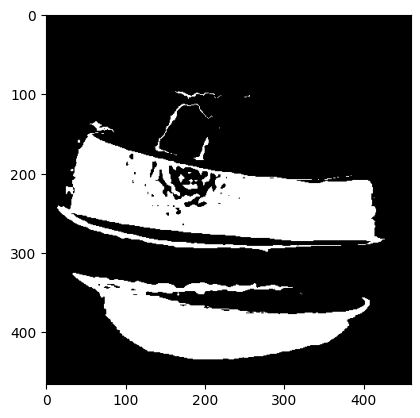

In [ ]:
plt.imshow(cluster_masks[0], cmap='gray')

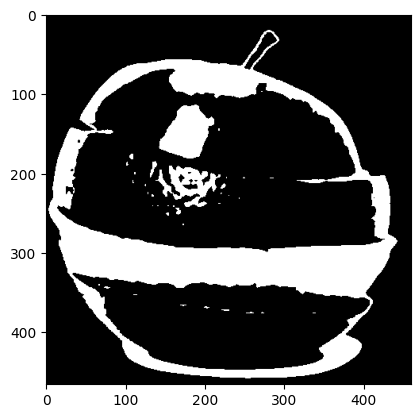

In [ ]:
plt.imshow(cluster_masks[3], cmap='gray')

In [ ]:
cluster_mask_images = []
for i, mask in enumerate(cluster_masks):
  cluster_color = centers[i]
  cluster_mask_rgb = np.zeros_like(fruit_rgb)
  cluster_mask_rgb[mask] = cluster_color
  cluster_mask_images.append(cluster_mask_rgb)

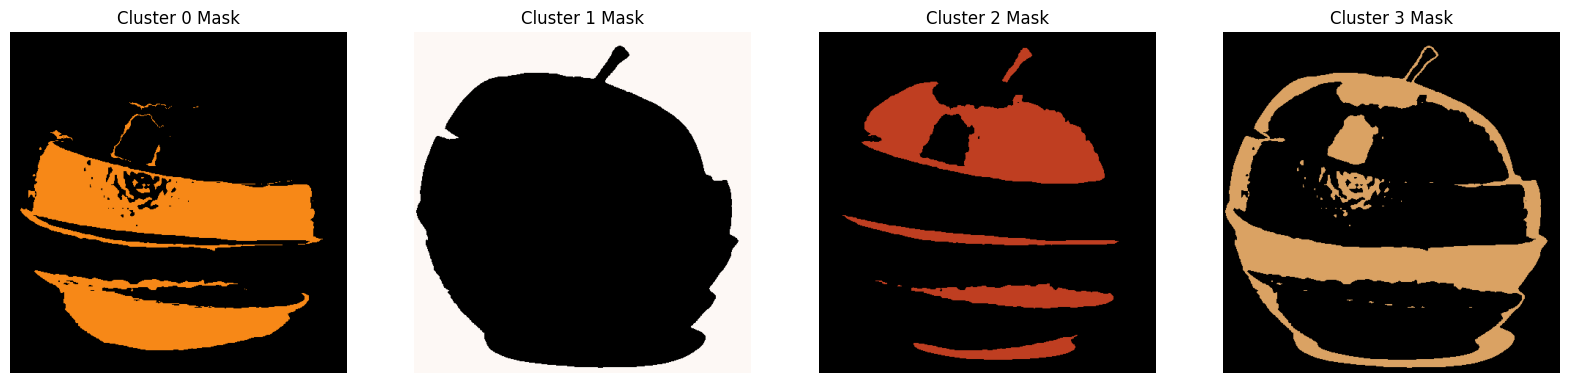

In [ ]:
plt.figure(figsize = (20, 20))
for i, mask_image in enumerate(cluster_mask_images):
  plt.subplot(1, K, i+1)
  plt.imshow(mask_image)
  plt.title(f'Cluster {i} Mask')
  plt.axis('off')

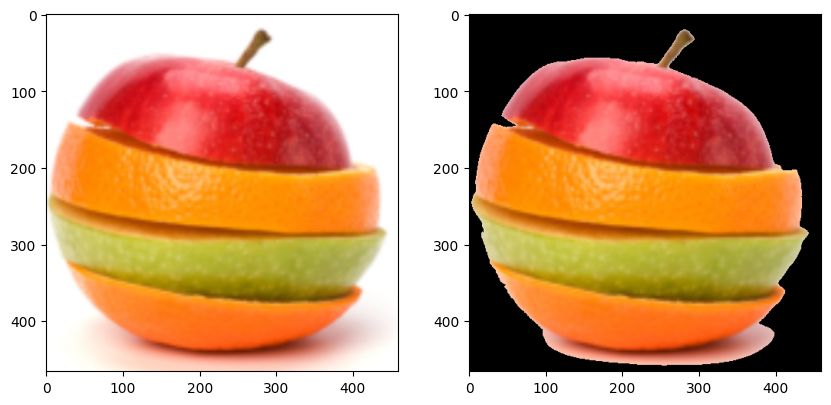

In [ ]:
merged_mask = cluster_masks[0] | cluster_masks[2] | cluster_masks[3]
merged_mask_rgb = np.zeros_like(fruit_rgb)
merged_mask_rgb[merged_mask] = fruit_rgb[merged_mask]

plt.figure(figsize = (10, 10), dpi = 100)
plt.subplot(1, 2, 1)
plt.imshow(fruit_rgb)
plt.subplot(1, 2, 2)
plt.imshow(merged_mask_rgb)
plt.show()

In [ ]:
pixel_colors1 = fruit_rgb.reshape(-1, 3)
pixel_colors1.shape

(214360, 3)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

In [ ]:
norm1 = colors.Normalize()
norm1.autoscale(pixel_colors1)
pixel_colors1 = norm1(pixel_colors1).tolist()

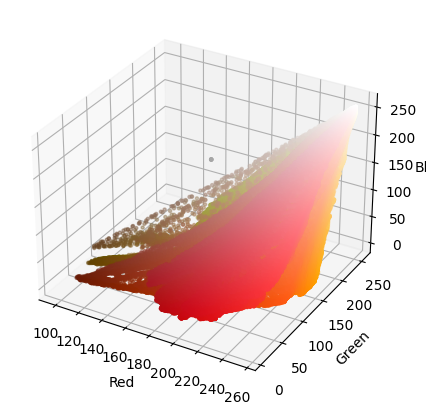

In [ ]:
#plotting image on 3d plot
fig = plt.figure(figsize = (5,5), dpi = 100)
axis = fig.add_subplot(1, 1, 1, projection = "3d")
axis.scatter(r, g, b, facecolors = pixel_colors1, marker = ".")

#the facecolor parameter specifies the color of each marker
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

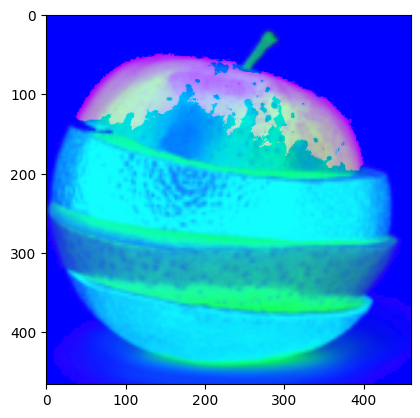

In [ ]:
fruit_hsv = cv2.cvtColor(fruit_rgb, cv2.COLOR_RGB2HSV)
plt.imshow(fruit_hsv)

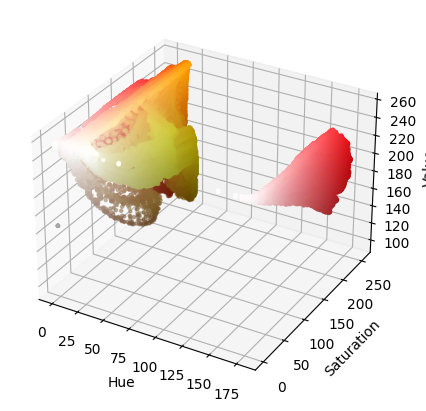

In [ ]:
#Use Thresholding segmentation approach for segmentation of fruits (foreground objects) from image
h, s, v = cv2.split(fruit_hsv)

#plotting image on 3d plot
fig = plt.figure(figsize = (5,5), dpi = 100)
axis = fig.add_subplot(1, 1, 1, projection = "3d")
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors = pixel_colors1, marker = ".")

#the facecolor parameter specifies the color of each marker
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

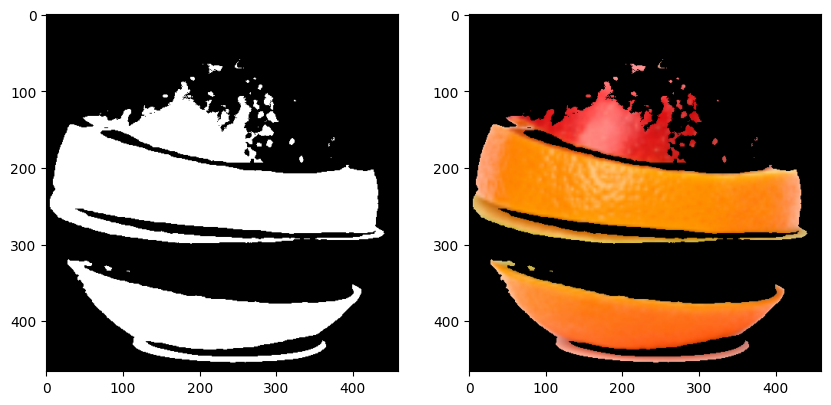

In [ ]:
#create mask for orange
low_thresh_orange1 = (0, 100, 200)
high_thresh_orange1 = (25, 255, 255)

orange_mask1 = cv2.inRange(fruit_hsv, low_thresh_orange1, high_thresh_orange1)
orange_mask1_result = cv2.bitwise_and(fruit_rgb, fruit_rgb, mask = orange_mask1)

plt.figure(figsize = (10, 10), dpi = 100)
plt.subplot(1, 2, 1)
plt.imshow(orange_mask1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(orange_mask1_result)
plt.show()

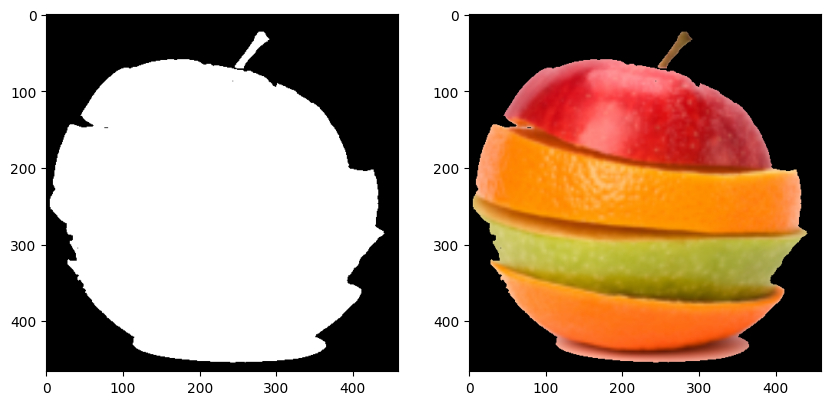

In [ ]:
#create mask for red
low_thresh_red = (0, 100, 50)
high_thresh_red = (255, 255, 255)

red_mask1 = cv2.inRange(fruit_hsv, low_thresh_red, high_thresh_red)
red_mask1_result = cv2.bitwise_and(fruit_rgb, fruit_rgb, mask = red_mask1)

plt.figure(figsize = (10, 10), dpi = 100)
plt.subplot(1, 2, 1)
plt.imshow(red_mask1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(red_mask1_result)
plt.show()

In [ ]:
final_mask1 = red_mask1 + orange_mask1
final_result1 = cv2.bitwise_and(fruit_rgb, fruit_rgb, mask = final_mask1)

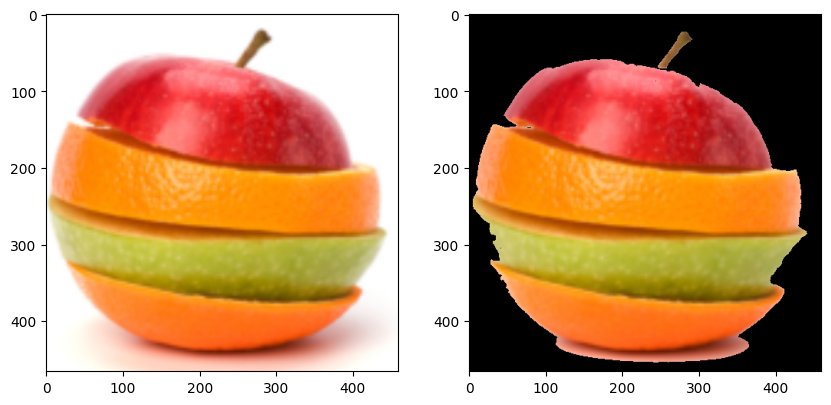

In [ ]:
plt.figure(figsize = (10, 10), dpi = 100)
plt.subplot(1, 2, 1)
plt.imshow(fruit_rgb)
plt.subplot(1, 2, 2)
plt.imshow(final_result1)
plt.show()